In [1]:
from astrodendro import Dendrogram, pp_catalog
from astropy.io import fits
from astropy import units as u
from astropy import wcs
import numpy as np
import radio_beam
import matplotlib.pyplot as pl

In [2]:
def compute_regions(min_val, min_del, npix, pdf):
    contfile = fits.open(filename)
    mywcs = wcs.WCS(contfile[0].header).celestial
    array = contfile[0].data.squeeze()
    beam = radio_beam.Beam.from_fits_header(contfile[0].header)
    d = Dendrogram.compute(array, min_value=min_val, min_delta = min_del, min_npix=npix, wcs=mywcs, verbose=False)
    
    metadata = {}
    metadata['data_unit'] = u.Jy / u.beam
    pixel_scale = np.abs(mywcs.pixel_scale_matrix.diagonal().prod())**0.5 * u.deg
    metadata['spatial_scale'] =  pixel_scale
    metadata['beam_major'] = beam.major
    metadata['beam_minor'] = beam.minor
    #metadata['wavelength'] = contfile[0].header['CRVAL3']*u.GHz
    metadata['wcs'] = mywcs
    cat = pp_catalog(d, metadata)
    
    with open(reg_file, 'w') as fh:
        fh.write("fk5\n")
        for row in cat:
            fh.write("ellipse({x_cen}, {y_cen}, {major_sigma}, "
                     "{minor_sigma}, {position_angle}) # text={{{_idx}}}\n"
    .format(**dict(zip(row.colnames, row))))
        
    if pdf == True:
        ax = pl.gca()
        ax.cla()
        pl.imshow(array, cmap='gray_r', interpolation='none', origin='lower',
            vmax=0.01, vmin=-0.001)
        pltr = d.plotter()
        for struct in d.leaves:
            cntr = pltr.plot_contour(ax, structure=struct, colors=['r'],
                                    linewidths=[0.9], zorder=5)
            if struct.parent:
                while struct.parent:
                    struct = struct.parent
                cntr_g = pltr.plot_contour(ax, structure=struct,
                                          colors=[(0,1,0,1)],
                                          linewidths=[0.2])

        #pl.setp(cntr.collections, linewidth=0.2)
        #pl.setp(cntr_g.collections, linewidth=0.2)
        pl.savefig(pdf_name)
    return cat

Currently not detecting sources with fluxes around 8e-4 even though this is higher than min value, could be because of min delta?

In [14]:
mval = 0.0008
mdel = 0.0008
npix = 10
pdf_bool = False

reg_file = 'orion_sourceI_B6_continuum_5mJy_1500kplus/orion_B6_dendrogram_minval{}_mindelta{}_npix{}.reg'.format(mval, mdel, npix)
pdf_name = 'orion_sourceI_B6_continuum_5mJy_1500kplus/orion_B6_image_minval{}_mindelta{}_npix{}.pdf'.format(mval, mdel, npix)

compute_regions(mval, mdel, npix, pdf_bool)

/users/jotter/anaconda3/lib/python3.6/site-packages/astrodendro/dendrogram.py:177: RuntimeWarning: invalid value encountered in greater
  keep = self.data > min_value


Generating dendrogram using 16,789 of 51,380,224 pixels (0.03267599611866231% of data)

[>                                        ] 0%
[>                                        ] 1%
[>                                        ] 1%
[>                                        ] 2%
[=>                                       ] 2%
[=>                                       ] 3%
[=>                                       ] 4%
[=>                                       ] 4%
[==>                                      ] 5%
[==>                                      ] 5%
[==>                                      ] 6%
[==>                                      ] 7%
[===>                                     ] 7%
[===>                                     ] 8%
[===>                                     ] 8%
[===>                                     ] 9%
[====>                                    ] 10%
[====>                                    ] 10%
[====>                                    ] 11%
[====>          

only detects 5 sources, try reducing all values

In [26]:
mval = 0.0004
mdel = 0.0004
npix = 5
pdf_bool = False

reg_file = 'orion_sourceI_B6_continuum_5mJy_1500kplus/orion_B6_dendrogram_minval{}_mindelta{}_npix{}.reg'.format(mval, mdel, npix)
pdf_name = 'orion_sourceI_B6_continuum_5mJy_1500kplus/orion_B6_image_minval{}_mindelta{}_npix{}.pdf'.format(mval, mdel, npix)

compute_regions(mval, mdel, npix, pdf_bool)

TypeError: compute_regions() takes 3 positional arguments but 4 were given

gets most sources, but a lot of edge noise sources - apply mask w these parameters

Computing catalog for 26 structures

[=>                                       ] 3%
[===>                                     ] 7%
[====>                                    ] 11%
[======>                                  ] 15%
[=======>                                 ] 19%
[=========>                               ] 23%
[==========>                              ] 26%
[============>                            ] 30%
[=============>                           ] 34%
[===============>                         ] 38%
[================>                        ] 42%
[==================>                      ] 46%
[====================>                    ] 50%
[=====================>                   ] 53%
[=======================>                 ] 57%
[========================>                ] 61%
[==========================>              ] 65%
[===========================>             ] 69%
[=============================>           ] 73%
[==============================>          ] 76%
[====


[=======================================> ] 99%
[========================================>] 100%


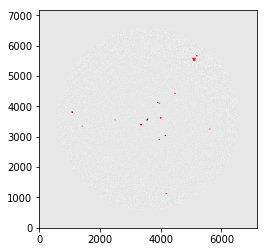

In [29]:
mval = 0.0004
mdel = 0.0004
npix = 5
pdf_bool = True

filename = '/lustre/aoc/students/jotter/masked/orion_B6_cont_1500kplus_masked.fits'

reg_file = 'orion_sourceI_B6_continuum_5mJy_1500kplus_masked/orion_B6_dendrogram_minval{}_mindelta{}_npix{}.reg'.format(mval, mdel, npix)
pdf_name = 'orion_sourceI_B6_continuum_5mJy_1500kplus_masked/orion_B6_image_minval{}_mindelta{}_npix{}.pdf'.format(mval, mdel, npix)

compute_regions(mval, mdel, npix, pdf_bool)

above seems to catalog most if not all sources without including noise because of mask - 25 sources

need to check whether some of the little points are sources that should be detected

also make sure that the masked portion does not include any sources

In [24]:
mval = 0.0002
mdel = 0.0004
npix = 10
pdf_bool = False

filename = '/lustre/aoc/students/jotter/masked/orion_B6_cont_1500kplus_masked.fits'

reg_file = 'orion_sourceI_B6_continuum_5mJy_1500kplus_masked/orion_B6_dendrogram_minval{}_mindelta{}_npix{}.reg'.format(mval, mdel, npix)
pdf_name = 'orion_sourceI_B6_continuum_5mJy_1500kplus_masked/orion_B6_image_minval{}_mindelta{}_npix{}.pdf'.format(mval, mdel, npix)

compute_regions(mval, mdel, npix, pdf_bool)

Computing catalog for 109 structures

[>                                        ] 0%
[>                                        ] 1%
[=>                                       ] 2%
[=>                                       ] 3%
[=>                                       ] 4%
[==>                                      ] 5%
[==>                                      ] 6%
[==>                                      ] 7%
[===>                                     ] 8%
[===>                                     ] 9%
[====>                                    ] 10%
[====>                                    ] 11%
[====>                                    ] 11%
[=====>                                   ] 12%
[=====>                                   ] 13%
[=====>                                   ] 14%
[======>                                  ] 15%
[======>                                  ] 16%
[======>                                  ] 17%
[=======>                                 ] 18%
[=======>   


[=========>                               ] 23%
[=========>                               ] 24%
[==========>                              ] 25%
[==========>                              ] 26%
[===========>                             ] 27%
[===========>                             ] 28%
[===========>                             ] 29%
[============>                            ] 30%
[============>                            ] 31%
[============>                            ] 32%
[=============>                           ] 33%
[=============>                           ] 33%
[=============>                           ] 34%
[==============>                          ] 35%
[==============>                          ] 36%
[===============>                         ] 37%
[===============>                         ] 38%
[===============>                         ] 39%
[================>                        ] 40%
[================>                        ] 41%
[================>                     

above cell has too low a value, includes a lot of noise. Try intermediate value

Computing catalog for 19 structures

[==>                                      ] 5%
[====>                                    ] 10%
[======>                                  ] 15%
[========>                                ] 21%
[==========>                              ] 26%
[============>                            ] 31%
[==============>                          ] 36%
[================>                        ] 42%
[==================>                      ] 47%
[=====================>                   ] 52%
[=======================>                 ] 57%
[=========================>               ] 63%
[===========================>             ] 68%
[=============================>           ] 73%
[===============================>         ] 78%
[=================================>       ] 84%
[===================================>     ] 89%
[=====================================>   ] 94%
[========================================>] 100%
[========================================>] 100%


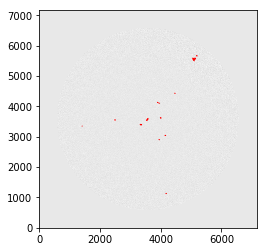

In [28]:
mval = 0.0003
mdel = 0.0006
npix = 10
pdf_bool = True

filename = '/lustre/aoc/students/jotter/masked/orion_B6_cont_1500kplus_masked.fits'

reg_file = 'orion_sourceI_B6_continuum_5mJy_1500kplus_masked/orion_B6_dendrogram_minval{}_mindelta{}_npix{}.reg'.format(mval, mdel, npix)
pdf_name = 'orion_sourceI_B6_continuum_5mJy_1500kplus_masked/orion_B6_image_minval{}_mindelta{}_npix{}.pdf'.format(mval, mdel, npix)

compute_regions(mval, mdel, npix, pdf_bool)

Above does not include any noise, except around upper right source (side lobes?). 18 regions detected.

interesting that fewer regions detected - could be min delta or npix

Computing catalog for 19 structures

[==>                                      ] 5%
[====>                                    ] 10%
[======>                                  ] 15%
[========>                                ] 21%
[==========>                              ] 26%
[============>                            ] 31%
[==============>                          ] 36%
[================>                        ] 42%
[==================>                      ] 47%
[=====================>                   ] 52%
[=======================>                 ] 57%
[=========================>               ] 63%
[===========================>             ] 68%
[=============================>           ] 73%
[===============================>         ] 78%
[=================================>       ] 84%
[===================================>     ] 89%
[=====================================>   ] 94%
[========================================>] 100%
[========================================>] 100%


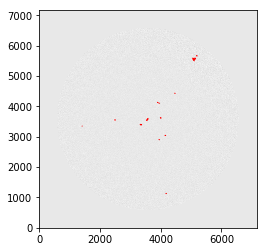

In [30]:
mval = 0.0003
mdel = 0.0006
npix = 5
pdf_bool = True

filename = '/lustre/aoc/students/jotter/masked/orion_B6_cont_1500kplus_masked.fits'

reg_file = 'orion_sourceI_B6_continuum_5mJy_1500kplus_masked/orion_B6_dendrogram_minval{}_mindelta{}_npix{}.reg'.format(mval, mdel, npix)
pdf_name = 'orion_sourceI_B6_continuum_5mJy_1500kplus_masked/orion_B6_image_minval{}_mindelta{}_npix{}.pdf'.format(mval, mdel, npix)

compute_regions(mval, mdel, npix, pdf_bool)

above: no apparent change from npix = 10 to 5

Computing catalog for 40 structures

[=>                                       ] 2%
[==>                                      ] 5%
[===>                                     ] 7%
[====>                                    ] 10%
[=====>                                   ] 12%
[======>                                  ] 15%
[=======>                                 ] 17%
[========>                                ] 20%
[=========>                               ] 22%
[==========>                              ] 25%
[===========>                             ] 27%
[============>                            ] 30%
[=============>                           ] 32%
[==============>                          ] 35%
[===============>                         ] 37%
[================>                        ] 40%
[=================>                       ] 42%
[==================>                      ] 45%
[===================>                     ] 47%
[====================>                    ] 50%
[=====


[===========================>             ] 67%
[============================>            ] 70%
[=============================>           ] 72%
[==============================>          ] 75%
[===============================>         ] 77%
[================================>        ] 80%
[=================================>       ] 82%
[==================================>      ] 85%
[===================================>     ] 87%
[====================================>    ] 90%
[=====================================>   ] 92%
[======================================>  ] 95%
[=======================================> ] 97%
[========================================>] 100%
[========================================>] 100%


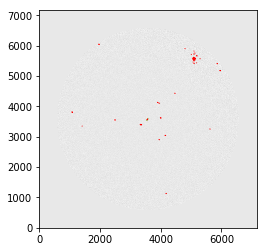

In [31]:
mval = 0.0003
mdel = 0.0004
npix = 10
pdf_bool = True

filename = '/lustre/aoc/students/jotter/masked/orion_B6_cont_1500kplus_masked.fits'

reg_file = 'orion_sourceI_B6_continuum_5mJy_1500kplus_masked/orion_B6_dendrogram_minval{}_mindelta{}_npix{}.reg'.format(mval, mdel, npix)
pdf_name = 'orion_sourceI_B6_continuum_5mJy_1500kplus_masked/orion_B6_image_minval{}_mindelta{}_npix{}.pdf'.format(mval, mdel, npix)

compute_regions(mval, mdel, npix, pdf_bool)

Above has 40 regions - many appear to be noise

increase min delta

Computing catalog for 25 structures

[=>                                       ] 4%
[===>                                     ] 8%
[====>                                    ] 12%
[======>                                  ] 16%
[========>                                ] 20%
[=========>                               ] 24%
[===========>                             ] 28%
[============>                            ] 32%
[==============>                          ] 36%
[================>                        ] 40%
[=================>                       ] 44%
[===================>                     ] 48%
[====================>                    ] 52%
[======================>                  ] 56%
[========================>                ] 60%
[=========================>               ] 64%
[===========================>             ] 68%
[============================>            ] 72%
[==============================>          ] 76%
[================================>        ] 80%
[====


[========================================>] 100%
[========================================>] 100%


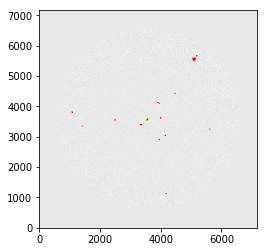

In [32]:
mval = 0.0003
mdel = 0.0005
npix = 10
pdf_bool = True

filename = '/lustre/aoc/students/jotter/masked/orion_B6_cont_1500kplus_masked.fits'

reg_file = 'orion_sourceI_B6_continuum_5mJy_1500kplus_masked/orion_B6_dendrogram_minval{}_mindelta{}_npix{}.reg'.format(mval, mdel, npix)
pdf_name = 'orion_sourceI_B6_continuum_5mJy_1500kplus_masked/orion_B6_image_minval{}_mindelta{}_npix{}.pdf'.format(mval, mdel, npix)

compute_regions(mval, mdel, npix, pdf_bool)

above appears to have all sources detected, check w adam if small areas are sources or noise, also make sure mask isn't cutting off any sources.

/users/jotter/anaconda3/lib/python3.6/site-packages/astrodendro/dendrogram.py:177: RuntimeWarning: invalid value encountered in greater
  keep = self.data > min_value


Computing catalog for 21 structures

[=>                                       ] 4%
[===>                                     ] 9%
[=====>                                   ] 14%
[=======>                                 ] 19%
[=========>                               ] 23%
[===========>                             ] 28%
[=============>                           ] 33%
[===============>                         ] 38%


[=================>                       ] 42%
[===================>                     ] 47%
[====================>                    ] 52%
[======================>                  ] 57%
[========================>                ] 61%
[==========================>              ] 66%
[============================>            ] 71%
[==============================>          ] 76%
[================================>        ] 80%
[==================================>      ] 85%
[====================================>    ] 90%
[======================================>  ] 95%
[=======================================> ] 99%
[========================================>] 100%


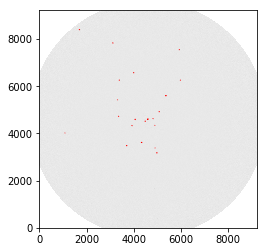

In [33]:
mval = 0.0003
mdel = 0.0005
npix = 10
pdf_bool = True

filename = '/lustre/aoc/students/jotter/masked/orion_B3_cont_masked_5000.fits'

reg_file = 'orion_sourceI_B3_continuum_1mJy_masked/orion_B3_dendrogram_minval{}_mindelta{}_npix{}_5000.reg'.format(mval, mdel, npix)
pdf_name = 'orion_sourceI_B3_continuum_1mJy_masked/orion_B3_image_minval{}_mindelta{}_npix{}_5000.pdf'.format(mval, mdel, npix)

compute_regions(mval, mdel, npix, pdf_bool)

above: amny sources discovered, but there are a lot more not included

In [34]:
mval = 0.0001
mdel = 0.0002
npix = 10
pdf_bool = False

filename = '/lustre/aoc/students/jotter/masked/orion_B3_cont_masked_5000.fits'

reg_file = 'orion_sourceI_B3_continuum_1mJy_masked/orion_B3_dendrogram_minval{}_mindelta{}_npix{}_5000.reg'.format(mval, mdel, npix)
pdf_name = 'orion_sourceI_B3_continuum_1mJy_masked/orion_B3_image_minval{}_mindelta{}_npix{}_5000.pdf'.format(mval, mdel, npix)

compute_regions(mval, mdel, npix, pdf_bool)

/users/jotter/anaconda3/lib/python3.6/site-packages/astrodendro/dendrogram.py:177: RuntimeWarning: invalid value encountered in greater
  keep = self.data > min_value


Computing catalog for 306 structures

[>                                        ] 0%
[>                                        ] 0%
[>                                        ] 0%
[>                                        ] 1%
[>                                        ] 1%
[>                                        ] 1%
[>                                        ] 2%
[=>                                       ] 2%
[=>                                       ] 2%
[=>                                       ] 3%
[=>                                       ] 3%
[=>                                       ] 3%
[=>                                       ] 4%
[=>                                       ] 4%
[=>                                       ] 4%
[==>                                      ] 5%
[==>                                      ] 5%
[==>                                      ] 5%
[==>                                      ] 6%
[==>                                      ] 6%
[==>                  


[===>                                     ] 8%
[===>                                     ] 9%
[===>                                     ] 9%
[===>                                     ] 9%
[====>                                    ] 10%
[====>                                    ] 10%
[====>                                    ] 10%
[====>                                    ] 11%
[====>                                    ] 11%
[====>                                    ] 11%
[====>                                    ] 12%
[====>                                    ] 12%
[=====>                                   ] 12%
[=====>                                   ] 13%
[=====>                                   ] 13%
[=====>                                   ] 13%
[=====>                                   ] 14%
[=====>                                   ] 14%
[=====>                                   ] 14%
[======>                                  ] 15%
[======>                                  ]

from above, need to mask more of side regions - decrease r from 5000 to 4500, maybe less

there are some sources pretty close to the edge

some sources still not detected - lower thresholds 

In [35]:
mval = 0.0001
mdel = 0.00015
npix = 10
pdf_bool = False

filename = '/lustre/aoc/students/jotter/masked/orion_B3_cont_masked_4500.fits'

reg_file = 'orion_sourceI_B3_continuum_1mJy_masked/orion_B3_dendrogram_minval{}_mindelta{}_npix{}_4500.reg'.format(mval, mdel, npix)
pdf_name = 'orion_sourceI_B3_continuum_1mJy_masked/orion_B3_image_minval{}_mindelta{}_npix{}_4500.pdf'.format(mval, mdel, npix)

compute_regions(mval, mdel, npix, pdf_bool)

/users/jotter/anaconda3/lib/python3.6/site-packages/astrodendro/dendrogram.py:177: RuntimeWarning: invalid value encountered in greater
  keep = self.data > min_value


Computing catalog for 262 structures

[>                                        ] 0%
[>                                        ] 0%
[>                                        ] 1%
[>                                        ] 1%
[>                                        ] 1%
[>                                        ] 2%
[=>                                       ] 2%
[=>                                       ] 3%
[=>                                       ] 3%
[=>                                       ] 3%
[=>                                       ] 4%
[=>                                       ] 4%
[=>                                       ] 4%
[==>                                      ] 5%
[==>                                      ] 5%
[==>                                      ] 6%
[==>                                      ] 6%
[==>                                      ] 6%
[==>                                      ] 7%
[===>                                     ] 7%
[===>                 


[====>                                    ] 10%
[====>                                    ] 10%
[====>                                    ] 11%
[====>                                    ] 11%
[====>                                    ] 11%
[====>                                    ] 12%
[=====>                                   ] 12%
[=====>                                   ] 12%
[=====>                                   ] 13%
[=====>                                   ] 13%
[=====>                                   ] 14%
[=====>                                   ] 14%
[=====>                                   ] 14%
[======>                                  ] 15%
[======>                                  ] 15%
[======>                                  ] 16%
[======>                                  ] 16%
[======>                                  ] 16%
[======>                                  ] 17%
[=======>                                 ] 17%
[=======>                              

still needs more masking, but may lose some sources?

some small sources undetected

In [36]:
mval = 0.0001
mdel = 0.00015
npix = 5
pdf_bool = False

filename = '/lustre/aoc/students/jotter/masked/orion_B3_cont_masked_4000.fits'

reg_file = 'orion_sourceI_B3_continuum_1mJy_masked/orion_B3_dendrogram_minval{}_mindelta{}_npix{}_4000.reg'.format(mval, mdel, npix)
pdf_name = 'orion_sourceI_B3_continuum_1mJy_masked/orion_B3_image_minval{}_mindelta{}_npix{}_4000.pdf'.format(mval, mdel, npix)

compute_regions(mval, mdel, npix, pdf_bool)

/users/jotter/anaconda3/lib/python3.6/site-packages/astrodendro/dendrogram.py:177: RuntimeWarning: invalid value encountered in greater
  keep = self.data > min_value


Computing catalog for 69 structures

[>                                        ] 1%
[=>                                       ] 2%
[=>                                       ] 4%
[==>                                      ] 5%
[==>                                      ] 7%
[===>                                     ] 8%
[====>                                    ] 10%
[====>                                    ] 11%
[=====>                                   ] 13%
[=====>                                   ] 14%
[======>                                  ] 15%
[======>                                  ] 17%
[=======>                                 ] 18%
[========>                                ] 20%
[========>                                ] 21%
[=========>                               ] 23%
[=========>                               ] 24%
[==========>                              ] 26%
[===========>                             ] 27%
[===========>                             ] 28%
[========


[================>                        ] 40%
[================>                        ] 42%
[=================>                       ] 43%
[=================>                       ] 44%
[==================>                      ] 46%
[===================>                     ] 47%
[===================>                     ] 49%
[====================>                    ] 50%
[====================>                    ] 52%
[=====================>                   ] 53%
[======================>                  ] 55%
[======================>                  ] 56%
[=======================>                 ] 57%
[=======================>                 ] 59%
[========================>                ] 60%
[========================>                ] 62%
[=========================>               ] 63%
[==========================>              ] 65%
[==========================>              ] 66%
[===========================>             ] 68%
[===========================>          

In [5]:
mval = 0.0001
mdel = 0.00015
npix = 5
pdf_bool = False

filename = '/lustre/aoc/students/jotter/masked/orion_B3_cont_masked_4800.fits'

reg_file = 'orion_sourceI_B3_continuum_1mJy_masked/orion_B3_dendrogram_minval{}_mindelta{}_npix{}_4800.reg'.format(mval, mdel, npix)
pdf_name = 'orion_sourceI_B3_continuum_1mJy_masked/orion_B3_image_minval{}_mindelta{}_npix{}_4800.pdf'.format(mval, mdel, npix)

compute_regions(mval, mdel, npix, pdf_bool)

/users/jotter/anaconda3/lib/python3.6/site-packages/astrodendro/dendrogram.py:177: RuntimeWarning: invalid value encountered in greater
  keep = self.data > min_value


Computing catalog for 941 structures

[>                                        ] 0%
[>                                        ] 0%
[>                                        ] 0%
[>                                        ] 0%
[>                                        ] 0%
[>                                        ] 0%
[>                                        ] 0%
[>                                        ] 0%
[>                                        ] 0%
[>                                        ] 1%
[>                                        ] 1%
[>                                        ] 1%
[>                                        ] 1%
[>                                        ] 1%
[>                                        ] 1%
[>                                        ] 1%
[>                                        ] 1%
[>                                        ] 1%
[>                                        ] 2%
[>                                        ] 2%
[>                    


[=>                                       ] 2%
[=>                                       ] 2%
[=>                                       ] 2%
[=>                                       ] 3%
[=>                                       ] 3%
[=>                                       ] 3%
[=>                                       ] 3%
[=>                                       ] 3%
[=>                                       ] 3%
[=>                                       ] 3%
[=>                                       ] 3%
[=>                                       ] 3%
[=>                                       ] 4%
[=>                                       ] 4%
[=>                                       ] 4%
[=>                                       ] 4%
[=>                                       ] 4%
[=>                                       ] 4%
[=>                                       ] 4%
[=>                                       ] 4%
[=>                                       ] 4%
[=>         

[===============>                         ] 39%
[===============>                         ] 39%
[===============>                         ] 39%
[===============>                         ] 39%
[===============>                         ] 39%
[===============>                         ] 39%
[===============>                         ] 39%
[===============>                         ] 39%
[===============>                         ] 39%
[================>                        ] 40%
[================>                        ] 40%
[================>                        ] 40%
[================>                        ] 40%
[================>                        ] 40%
[================>                        ] 40%
[================>                        ] 40%
[================>                        ] 40%
[================>                        ] 40%
[================>                        ] 41%
[================>                        ] 41%
[================>                      

[==============================>          ] 75%
[==============================>          ] 75%
[==============================>          ] 75%
[==============================>          ] 75%
[==============================>          ] 75%
[==============================>          ] 75%
[==============================>          ] 75%
[==============================>          ] 75%
[==============================>          ] 76%
[==============================>          ] 76%
[==============================>          ] 76%
[==============================>          ] 76%
[==============================>          ] 76%
[==============================>          ] 76%
[==============================>          ] 76%
[==============================>          ] 76%
[==============================>          ] 76%
[==============================>          ] 77%
[==============================>          ] 77%
[==============================>          ] 77%
[==============================>        

_idx,area_ellipse,area_exact,flux,major_sigma,minor_sigma,position_angle,radius,x_cen,y_cen
,deg2,deg2,Jy,deg,deg,deg,deg,,
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64
0,2.272217150717932e-11,7.407407407405927e-11,6.198670130362966e-05,3.2555276735834904e-06,1.6026198091064232e-06,169.491044552991,2.2841569864567216e-06,83.80827024486412,-5.385393994179392
1,3.4824187043426926e-11,1.1358024691355755e-10,8.530433665426858e-05,4.206250747356406e-06,1.9010252809478569e-06,134.6532694837006,2.8277533500520064e-06,83.81008964022732,-5.385380921251445
2,5.1492113419214003e-11,1.7283950617280496e-10,0.00012867789423267074,6.234714294536176e-06,1.8963837481105805e-06,137.70240533406854,3.4385187017480548e-06,83.81211691258594,-5.385377404512529
3,3.414533525465177e-11,1.1851851851849483e-10,9.548129008857869e-05,4.015902822652705e-06,1.9523166153003072e-06,153.35330226261155,2.8000560362421822e-06,83.81348381804916,-5.385373246049473
4,3.209944874448325e-11,1.0864197530862027e-10,8.202590635657816e-05,3.3746840255373696e-06,2.184069845621758e-06,128.90673897063044,2.714874880851347e-06,83.8088887424899,-5.3853611698040655
5,7.449599699569293e-11,2.1234567901230324e-10,0.00014355886390848016,7.047935759259331e-06,2.427018374104506e-06,168.68977341084818,4.135875915357058e-06,83.80783125445292,-5.38535604597461
6,6.707123833301266e-11,2.1728395061724054e-10,0.00014909566702367538,8.176192965604949e-06,1.883593818264006e-06,149.34425576246954,3.924363200182564e-06,83.80875457032228,-5.385349978492255
7,4.226171097338326e-11,1.4814814814811854e-10,0.00012588776117253894,5.12482521241981e-06,1.8935208081924546e-06,139.32155784807065,3.1151184853976626e-06,83.81338359747417,-5.385351366461171


above detects 941 sources, most are noise but there are some real sources close to the edge. Increasing the thresholds might lose detections of some of these real sources. There are also a couple sources still undetected, like (3646, 4540).

In [6]:
mval = 0.0001
mdel = 0.00015
npix = 5
pdf_bool = False

filename = '/lustre/aoc/students/jotter/directory/Orion_SourceI_B3_continuum_r-2.clean0.1mJy.image.tt0.fits'

reg_file = 'orion_sourceI_B3_continuum_1mJy_nonpbcorr/orion_B3_dendrogram_minval{}_mindelta{}_npix{}_4800.reg'.format(mval, mdel, npix)
pdf_name = 'orion_sourceI_B3_continuum_1mJy_nonpbcorr/orion_B3_image_minval{}_mindelta{}_npix{}_4800.pdf'.format(mval, mdel, npix)

compute_regions(mval, mdel, npix, pdf_bool)

/users/jotter/anaconda3/lib/python3.6/site-packages/astrodendro/dendrogram.py:177: RuntimeWarning: invalid value encountered in greater
  keep = self.data > min_value


Computing catalog for 53 structures

[>                                        ] 1%
[=>                                       ] 3%
[==>                                      ] 5%
[===>                                     ] 7%
[===>                                     ] 9%
[====>                                    ] 11%
[=====>                                   ] 13%
[======>                                  ] 15%
[======>                                  ] 16%
[=======>                                 ] 18%
[========>                                ] 20%
[=========>                               ] 22%
[=========>                               ] 24%
[==========>                              ] 26%
[===========>                             ] 28%
[============>                            ] 30%
[============>                            ] 32%
[=============>                           ] 33%
[==============>                          ] 35%
[===============>                         ] 37%
[=======


[====================>                    ] 50%
[=====================>                   ] 52%
[=====================>                   ] 54%
[======================>                  ] 56%
[=======================>                 ] 58%
[========================>                ] 60%
[========================>                ] 62%
[=========================>               ] 64%
[==========================>              ] 66%
[===========================>             ] 67%
[===========================>             ] 69%
[============================>            ] 71%
[=============================>           ] 73%
[==============================>          ] 75%
[==============================>          ] 77%
[===============================>         ] 79%
[================================>        ] 81%
[=================================>       ] 83%
[=================================>       ] 84%
[==================================>      ] 86%
[===================================>  

_idx,area_ellipse,area_exact,flux,major_sigma,minor_sigma,position_angle,radius,x_cen,y_cen
,deg2,deg2,Jy,deg,deg,deg,deg,,
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64
0,4.237453115336021e-10,1.3777777777775024e-09,0.000990650905013313,1.252771804651161e-05,7.766672633796746e-06,-161.00485811805987,9.86400957601742e-06,83.80955322843253,-5.384499184387669
1,2.3393536483209847e-10,8.888888888887112e-10,0.0009800768071447738,1.0107500589402716e-05,5.314399145697097e-06,123.52631061707129,7.329071735046308e-06,83.8098602552237,-5.3816809796776015
2,1.9736928027704782e-10,7.506172839504673e-10,0.0008757995507743165,7.248246989001457e-06,6.252427117158771e-06,-177.7156742295111,6.731948902501944e-06,83.81123906762525,-5.380395797428704
3,4.466550470343043e-10,1.7432098765428614e-09,0.0021222859361584756,1.4619596946122172e-05,7.015181479916078e-06,-140.92878601383413,1.0127147956866924e-05,83.81189674046776,-5.378926238932373
4,1.161131987291882e-10,4.098765432097946e-10,0.00035912000722270214,7.166008940734175e-06,3.7205428266091623e-06,136.29332139159678,5.1634720063021215e-06,83.8064565845112,-5.378783570706439
5,5.024593325917687e-10,2.3703703703698967e-09,0.005188258697037132,1.1598974603750435e-05,9.946799960601229e-06,-159.08711701839326,1.074116754043058e-05,83.80963149616045,-5.37833575046813
6,1.224105788913649e-10,5.234567901233522e-10,0.0007683546518989563,7.1406007587924115e-06,3.9362825450067115e-06,142.36309964919613,5.301643342181389e-06,83.80979395997043,-5.377884443241339
7,1.39629891200773e-10,4.740740740739793e-10,0.00036683453003438614,7.911125554150155e-06,4.052678821767776e-06,-179.90126444645503,5.662265535070763e-06,83.814137234654,-5.377731511345396


no noise detections, but some sources also not detected. Looks like no masking required

In [8]:
mval = 0.00008
mdel = 0.00012
npix = 5
pdf_bool = False

filename = '/lustre/aoc/students/jotter/directory/Orion_SourceI_B3_continuum_r-2.clean0.1mJy.image.tt0.fits'

reg_file = 'orion_sourceI_B3_continuum_1mJy_nonpbcorr/orion_B3_dendrogram_minval{}_mindelta{}_npix{}.reg'.format(mval, mdel, npix)
pdf_name = 'orion_sourceI_B3_continuum_1mJy_nonpbcorr/orion_B3_image_minval{}_mindelta{}_npix{}.pdf'.format(mval, mdel, npix)

a = compute_regions(mval, mdel, npix, pdf_bool)

/users/jotter/anaconda3/lib/python3.6/site-packages/astrodendro/dendrogram.py:177: RuntimeWarning: invalid value encountered in greater
  keep = self.data > min_value


Computing catalog for 65 structures

[>                                        ] 1%
[=>                                       ] 3%
[=>                                       ] 4%
[==>                                      ] 6%
[===>                                     ] 7%
[===>                                     ] 9%
[====>                                    ] 10%
[====>                                    ] 12%
[=====>                                   ] 13%
[======>                                  ] 15%
[======>                                  ] 16%
[=======>                                 ] 18%
[========>                                ] 20%
[========>                                ] 21%
[=========>                               ] 23%
[=========>                               ] 24%
[==========>                              ] 26%
[===========>                             ] 27%
[===========>                             ] 29%
[============>                            ] 30%
[========


[================>                        ] 41%
[=================>                       ] 43%
[=================>                       ] 44%
[==================>                      ] 46%
[===================>                     ] 47%
[===================>                     ] 49%
[====================>                    ] 50%
[====================>                    ] 52%
[=====================>                   ] 53%
[======================>                  ] 55%
[======================>                  ] 56%
[=======================>                 ] 58%
[========================>                ] 60%
[========================>                ] 61%
[=========================>               ] 63%
[=========================>               ] 64%
[==========================>              ] 66%
[===========================>             ] 67%
[===========================>             ] 69%
[============================>            ] 70%
[============================>         

more sources detected, still a few undetected

In [9]:
mval = 0.00007
mdel = 0.0001
npix = 5
pdf_bool = False

filename = '/lustre/aoc/students/jotter/directory/Orion_SourceI_B3_continuum_r-2.clean0.1mJy.image.tt0.fits'

reg_file = 'orion_sourceI_B3_continuum_1mJy_nonpbcorr/orion_B3_dendrogram_minval{}_mindelta{}_npix{}.reg'.format(mval, mdel, npix)
pdf_name = 'orion_sourceI_B3_continuum_1mJy_nonpbcorr/orion_B3_image_minval{}_mindelta{}_npix{}.pdf'.format(mval, mdel, npix)

a = compute_regions(mval, mdel, npix, pdf_bool)

/users/jotter/anaconda3/lib/python3.6/site-packages/astrodendro/dendrogram.py:177: RuntimeWarning: invalid value encountered in greater
  keep = self.data > min_value


Computing catalog for 92 structures

[>                                        ] 1%
[>                                        ] 2%
[=>                                       ] 3%
[=>                                       ] 4%
[==>                                      ] 5%
[==>                                      ] 6%
[===>                                     ] 7%
[===>                                     ] 8%
[===>                                     ] 9%
[====>                                    ] 10%
[====>                                    ] 11%
[=====>                                   ] 13%
[=====>                                   ] 14%
[======>                                  ] 15%
[======>                                  ] 16%
[======>                                  ] 17%
[=======>                                 ] 18%
[=======>                                 ] 19%
[========>                                ] 20%
[========>                                ] 21%
[=========> 


[===========>                             ] 29%
[============>                            ] 30%
[============>                            ] 31%
[=============>                           ] 32%
[=============>                           ] 33%
[=============>                           ] 34%
[==============>                          ] 35%
[==============>                          ] 36%
[===============>                         ] 38%
[===============>                         ] 39%
[================>                        ] 40%
[================>                        ] 41%
[================>                        ] 42%
[=================>                       ] 43%
[=================>                       ] 44%
[==================>                      ] 45%
[==================>                      ] 46%
[===================>                     ] 47%
[===================>                     ] 48%
[====================>                    ] 50%
[====================>                 

better, but still a few undetected sources like at (2050,690). Also, some detections of extended emission near center

In [10]:
mval = 0.00006
mdel = 0.00009
npix = 5
pdf_bool = False

filename = '/lustre/aoc/students/jotter/directory/Orion_SourceI_B3_continuum_r-2.clean0.1mJy.image.tt0.fits'

reg_file = 'orion_sourceI_B3_continuum_1mJy_nonpbcorr/orion_B3_dendrogram_minval{}_mindelta{}_npix{}.reg'.format(mval, mdel, npix)
pdf_name = 'orion_sourceI_B3_continuum_1mJy_nonpbcorr/orion_B3_image_minval{}_mindelta{}_npix{}.pdf'.format(mval, mdel, npix)

a = compute_regions(mval, mdel, npix, pdf_bool)

/users/jotter/anaconda3/lib/python3.6/site-packages/astrodendro/dendrogram.py:177: RuntimeWarning: invalid value encountered in greater
  keep = self.data > min_value


Computing catalog for 123 structures

[>                                        ] 0%
[>                                        ] 1%
[>                                        ] 2%
[=>                                       ] 3%
[=>                                       ] 4%
[=>                                       ] 4%
[==>                                      ] 5%
[==>                                      ] 6%
[==>                                      ] 7%
[===>                                     ] 8%
[===>                                     ] 8%
[===>                                     ] 9%
[====>                                    ] 10%
[====>                                    ] 11%
[====>                                    ] 12%
[=====>                                   ] 13%
[=====>                                   ] 13%
[=====>                                   ] 14%
[======>                                  ] 15%
[======>                                  ] 16%
[======>      


[========>                                ] 21%
[========>                                ] 21%
[=========>                               ] 22%
[=========>                               ] 23%
[=========>                               ] 24%
[==========>                              ] 25%
[==========>                              ] 26%
[==========>                              ] 26%
[===========>                             ] 27%
[===========>                             ] 28%
[===========>                             ] 29%
[============>                            ] 30%
[============>                            ] 30%
[============>                            ] 31%
[=============>                           ] 32%
[=============>                           ] 33%
[=============>                           ] 34%
[=============>                           ] 34%
[==============>                          ] 35%
[==============>                          ] 36%
[==============>                       

still perhaps a few undetected sources, like (2500, 1370)

In [11]:
mval = 0.00005
mdel = 0.00005
npix = 5
pdf_bool = False

filename = '/lustre/aoc/students/jotter/directory/Orion_SourceI_B3_continuum_r-2.clean0.1mJy.image.tt0.fits'

reg_file = 'orion_sourceI_B3_continuum_1mJy_nonpbcorr/orion_B3_dendrogram_minval{}_mindelta{}_npix{}.reg'.format(mval, mdel, npix)
pdf_name = 'orion_sourceI_B3_continuum_1mJy_nonpbcorr/orion_B3_image_minval{}_mindelta{}_npix{}.pdf'.format(mval, mdel, npix)

a = compute_regions(mval, mdel, npix, pdf_bool)

/users/jotter/anaconda3/lib/python3.6/site-packages/astrodendro/dendrogram.py:177: RuntimeWarning: invalid value encountered in greater
  keep = self.data > min_value


Computing catalog for 5719 structures

[>                                        ] 0%
[>                                        ] 0%
[>                                        ] 0%
[>                                        ] 0%
[>                                        ] 0%
[>                                        ] 0%
[>                                        ] 0%
[>                                        ] 0%
[>                                        ] 0%
[>                                        ] 0%
[>                                        ] 0%
[>                                        ] 0%
[>                                        ] 0%
[>                                        ] 0%
[>                                        ] 0%
[>                                        ] 0%
[>                                        ] 0%
[>                                        ] 0%
[>                                        ] 0%
[>                                        ] 0%
[>                   


[>                                        ] 0%
[>                                        ] 0%
[>                                        ] 0%
[>                                        ] 0%
[>                                        ] 0%
[>                                        ] 0%
[>                                        ] 0%
[>                                        ] 0%
[>                                        ] 0%
[>                                        ] 0%
[>                                        ] 0%
[>                                        ] 0%
[>                                        ] 0%
[>                                        ] 0%
[>                                        ] 0%
[>                                        ] 0%
[>                                        ] 0%
[>                                        ] 0%
[>                                        ] 0%
[>                                        ] 0%
[>                                        ] 0%
[>          

[==>                                      ] 6%
[==>                                      ] 6%
[==>                                      ] 6%
[==>                                      ] 6%
[==>                                      ] 6%
[==>                                      ] 6%
[==>                                      ] 6%
[==>                                      ] 6%
[==>                                      ] 6%
[==>                                      ] 6%
[==>                                      ] 6%
[==>                                      ] 6%
[==>                                      ] 6%
[==>                                      ] 6%
[==>                                      ] 6%
[==>                                      ] 6%
[==>                                      ] 6%
[==>                                      ] 6%
[==>                                      ] 6%
[==>                                      ] 6%
[==>                                      ] 6%
[==>         

[=====>                                   ] 12%
[=====>                                   ] 12%
[=====>                                   ] 12%
[=====>                                   ] 12%
[=====>                                   ] 12%
[=====>                                   ] 12%
[=====>                                   ] 12%
[=====>                                   ] 12%
[=====>                                   ] 12%
[=====>                                   ] 12%
[=====>                                   ] 12%
[=====>                                   ] 12%
[=====>                                   ] 12%
[=====>                                   ] 12%
[=====>                                   ] 12%
[=====>                                   ] 12%
[=====>                                   ] 12%
[=====>                                   ] 12%
[=====>                                   ] 12%
[=====>                                   ] 12%
[=====>                                 

[=======>                                 ] 18%
[=======>                                 ] 18%
[=======>                                 ] 18%
[=======>                                 ] 18%
[=======>                                 ] 18%
[=======>                                 ] 18%
[=======>                                 ] 18%
[=======>                                 ] 18%
[=======>                                 ] 18%
[=======>                                 ] 18%
[=======>                                 ] 18%
[=======>                                 ] 18%
[=======>                                 ] 18%
[=======>                                 ] 18%
[=======>                                 ] 18%
[=======>                                 ] 18%
[=======>                                 ] 18%
[=======>                                 ] 18%
[=======>                                 ] 18%
[=======>                                 ] 18%
[=======>                               

[=========>                               ] 24%
[=========>                               ] 24%
[=========>                               ] 24%
[=========>                               ] 24%
[=========>                               ] 24%
[=========>                               ] 24%
[=========>                               ] 24%
[=========>                               ] 24%
[=========>                               ] 24%
[=========>                               ] 24%
[=========>                               ] 24%
[=========>                               ] 24%
[=========>                               ] 24%
[=========>                               ] 24%
[=========>                               ] 24%
[=========>                               ] 24%
[=========>                               ] 24%
[=========>                               ] 24%
[=========>                               ] 24%
[=========>                               ] 24%
[=========>                             

[============>                            ] 30%
[============>                            ] 30%
[============>                            ] 30%
[============>                            ] 30%
[============>                            ] 30%
[============>                            ] 30%
[============>                            ] 30%
[============>                            ] 30%
[============>                            ] 30%
[============>                            ] 30%
[============>                            ] 30%
[============>                            ] 30%
[============>                            ] 30%
[============>                            ] 30%
[============>                            ] 30%
[============>                            ] 30%
[============>                            ] 30%
[============>                            ] 30%
[============>                            ] 30%
[============>                            ] 30%
[============>                          

[==============>                          ] 36%
[==============>                          ] 36%
[==============>                          ] 36%
[==============>                          ] 36%
[==============>                          ] 36%
[==============>                          ] 36%
[==============>                          ] 36%
[==============>                          ] 36%
[==============>                          ] 36%
[==============>                          ] 36%
[==============>                          ] 36%
[==============>                          ] 36%
[==============>                          ] 36%
[==============>                          ] 36%
[==============>                          ] 36%
[==============>                          ] 36%
[==============>                          ] 36%
[==============>                          ] 36%
[==============>                          ] 36%
[==============>                          ] 36%
[==============>                        

[================>                        ] 42%
[================>                        ] 42%
[================>                        ] 42%
[================>                        ] 42%
[================>                        ] 42%
[================>                        ] 42%
[================>                        ] 42%
[================>                        ] 42%
[================>                        ] 42%
[================>                        ] 42%
[================>                        ] 42%
[=================>                       ] 42%
[=================>                       ] 42%
[=================>                       ] 42%
[=================>                       ] 42%
[=================>                       ] 42%
[=================>                       ] 42%
[=================>                       ] 42%
[=================>                       ] 42%
[=================>                       ] 42%
[=================>                     

[===================>                     ] 48%
[===================>                     ] 48%
[===================>                     ] 48%
[===================>                     ] 48%
[===================>                     ] 48%
[===================>                     ] 48%
[===================>                     ] 48%
[===================>                     ] 48%
[===================>                     ] 48%
[===================>                     ] 48%
[===================>                     ] 48%
[===================>                     ] 48%
[===================>                     ] 48%
[===================>                     ] 48%
[===================>                     ] 48%
[===================>                     ] 48%
[===================>                     ] 48%
[===================>                     ] 48%
[===================>                     ] 48%
[===================>                     ] 48%
[===================>                   

[=====================>                   ] 54%
[=====================>                   ] 54%
[=====================>                   ] 54%
[=====================>                   ] 54%
[=====================>                   ] 54%
[=====================>                   ] 54%
[=====================>                   ] 54%
[=====================>                   ] 54%
[=====================>                   ] 54%
[=====================>                   ] 54%
[=====================>                   ] 54%
[=====================>                   ] 54%
[=====================>                   ] 54%
[=====================>                   ] 54%
[=====================>                   ] 54%
[=====================>                   ] 54%
[=====================>                   ] 54%
[=====================>                   ] 54%
[=====================>                   ] 54%
[=====================>                   ] 54%
[=====================>                 

[========================>                ] 60%
[========================>                ] 60%
[========================>                ] 60%
[========================>                ] 60%
[========================>                ] 60%
[========================>                ] 60%
[========================>                ] 60%
[========================>                ] 60%
[========================>                ] 60%
[========================>                ] 60%
[========================>                ] 60%
[========================>                ] 60%
[========================>                ] 60%
[========================>                ] 60%
[========================>                ] 60%
[========================>                ] 60%
[========================>                ] 60%
[========================>                ] 60%
[========================>                ] 60%
[========================>                ] 60%
[========================>              

[==========================>              ] 66%
[==========================>              ] 66%
[==========================>              ] 66%
[==========================>              ] 66%
[==========================>              ] 66%
[==========================>              ] 66%
[==========================>              ] 66%
[==========================>              ] 66%
[==========================>              ] 66%
[==========================>              ] 66%
[==========================>              ] 66%
[==========================>              ] 66%
[==========================>              ] 66%
[==========================>              ] 66%
[==========================>              ] 66%
[==========================>              ] 66%
[==========================>              ] 66%
[==========================>              ] 66%
[==========================>              ] 66%
[==========================>              ] 66%
[==========================>            

[============================>            ] 72%
[============================>            ] 72%
[============================>            ] 72%
[============================>            ] 72%
[============================>            ] 72%
[============================>            ] 72%
[============================>            ] 72%
[============================>            ] 72%
[============================>            ] 72%
[============================>            ] 72%
[============================>            ] 72%
[============================>            ] 72%
[============================>            ] 72%
[============================>            ] 72%
[============================>            ] 72%
[============================>            ] 72%
[============================>            ] 72%
[============================>            ] 72%
[============================>            ] 72%
[============================>            ] 72%
[============================>          

[===============================>         ] 77%
[===============================>         ] 78%
[===============================>         ] 78%
[===============================>         ] 78%
[===============================>         ] 78%
[===============================>         ] 78%
[===============================>         ] 78%
[===============================>         ] 78%
[===============================>         ] 78%
[===============================>         ] 78%
[===============================>         ] 78%
[===============================>         ] 78%
[===============================>         ] 78%
[===============================>         ] 78%
[===============================>         ] 78%
[===============================>         ] 78%
[===============================>         ] 78%
[===============================>         ] 78%
[===============================>         ] 78%
[===============================>         ] 78%
[===============================>       

[=================================>       ] 83%
[=================================>       ] 83%
[=================================>       ] 83%
[=================================>       ] 83%
[=================================>       ] 84%
[=================================>       ] 84%
[=================================>       ] 84%
[=================================>       ] 84%
[=================================>       ] 84%
[=================================>       ] 84%
[=================================>       ] 84%
[=================================>       ] 84%
[=================================>       ] 84%
[=================================>       ] 84%
[=================================>       ] 84%
[=================================>       ] 84%
[=================================>       ] 84%
[=================================>       ] 84%
[=================================>       ] 84%
[=================================>       ] 84%
[=================================>     

[===================================>     ] 89%
[===================================>     ] 89%
[===================================>     ] 89%
[===================================>     ] 89%
[===================================>     ] 89%
[===================================>     ] 89%
[===================================>     ] 89%
[===================================>     ] 89%
[====================================>    ] 90%
[====================================>    ] 90%
[====================================>    ] 90%
[====================================>    ] 90%
[====================================>    ] 90%
[====================================>    ] 90%
[====================================>    ] 90%
[====================================>    ] 90%
[====================================>    ] 90%
[====================================>    ] 90%
[====================================>    ] 90%
[====================================>    ] 90%
[====================================>  

[======================================>  ] 95%
[======================================>  ] 95%
[======================================>  ] 95%
[======================================>  ] 95%
[======================================>  ] 95%
[======================================>  ] 95%
[======================================>  ] 95%
[======================================>  ] 95%
[======================================>  ] 95%
[======================================>  ] 95%
[======================================>  ] 95%
[======================================>  ] 96%
[======================================>  ] 96%
[======================================>  ] 96%
[======================================>  ] 96%
[======================================>  ] 96%
[======================================>  ] 96%
[======================================>  ] 96%
[======================================>  ] 96%
[======================================>  ] 96%
[======================================>

almost all noise - lower limit

In [12]:
mval = 0.00006
mdel = 0.00006
npix = 5
pdf_bool = False

filename = '/lustre/aoc/students/jotter/directory/Orion_SourceI_B3_continuum_r-2.clean0.1mJy.image.tt0.fits'

reg_file = 'orion_sourceI_B3_continuum_1mJy_nonpbcorr/orion_B3_dendrogram_minval{}_mindelta{}_npix{}.reg'.format(mval, mdel, npix)
pdf_name = 'orion_sourceI_B3_continuum_1mJy_nonpbcorr/orion_B3_image_minval{}_mindelta{}_npix{}.pdf'.format(mval, mdel, npix)

a = compute_regions(mval, mdel, npix, pdf_bool)

/users/jotter/anaconda3/lib/python3.6/site-packages/astrodendro/dendrogram.py:177: RuntimeWarning: invalid value encountered in greater
  keep = self.data > min_value


Computing catalog for 691 structures

[>                                        ] 0%
[>                                        ] 0%
[>                                        ] 0%
[>                                        ] 0%
[>                                        ] 0%
[>                                        ] 0%
[>                                        ] 1%
[>                                        ] 1%
[>                                        ] 1%
[>                                        ] 1%
[>                                        ] 1%
[>                                        ] 1%
[>                                        ] 1%
[>                                        ] 2%
[>                                        ] 2%
[>                                        ] 2%
[>                                        ] 2%
[=>                                       ] 2%
[=>                                       ] 2%
[=>                                       ] 2%
[=>                   


[=>                                       ] 3%
[=>                                       ] 4%
[=>                                       ] 4%
[=>                                       ] 4%
[=>                                       ] 4%
[=>                                       ] 4%
[=>                                       ] 4%
[=>                                       ] 4%
[==>                                      ] 5%
[==>                                      ] 5%
[==>                                      ] 5%
[==>                                      ] 5%
[==>                                      ] 5%
[==>                                      ] 5%
[==>                                      ] 5%
[==>                                      ] 6%
[==>                                      ] 6%
[==>                                      ] 6%
[==>                                      ] 6%
[==>                                      ] 6%
[==>                                      ] 6%
[==>        

[=====================>                   ] 53%
[=====================>                   ] 53%
[=====================>                   ] 53%
[=====================>                   ] 53%
[=====================>                   ] 53%
[=====================>                   ] 53%
[=====================>                   ] 54%
[=====================>                   ] 54%
[=====================>                   ] 54%
[=====================>                   ] 54%
[=====================>                   ] 54%
[=====================>                   ] 54%
[=====================>                   ] 54%
[======================>                  ] 55%
[======================>                  ] 55%
[======================>                  ] 55%
[======================>                  ] 55%
[======================>                  ] 55%
[======================>                  ] 55%
[======================>                  ] 56%
[======================>                

still some noise sources detected, increase min delta

In [14]:
mval = 0.00006
mdel = 0.00008
npix = 5
pdf_bool = False

filename = '/lustre/aoc/students/jotter/directory/Orion_SourceI_B3_continuum_r-2.clean0.1mJy.image.tt0.fits'

reg_file = 'orion_sourceI_B3_continuum_1mJy_nonpbcorr/orion_B3_dendrogram_minval{}_mindelta{}_npix{}.reg'.format(mval, mdel, npix)
pdf_name = 'orion_sourceI_B3_continuum_1mJy_nonpbcorr/orion_B3_image_minval{}_mindelta{}_npix{}.pdf'.format(mval, mdel, npix)

a = compute_regions(mval, mdel, npix, pdf_bool)

/users/jotter/anaconda3/lib/python3.6/site-packages/astrodendro/dendrogram.py:177: RuntimeWarning: invalid value encountered in greater
  keep = self.data > min_value


Computing catalog for 169 structures

[>                                        ] 0%
[>                                        ] 1%
[>                                        ] 1%
[>                                        ] 2%
[=>                                       ] 2%
[=>                                       ] 3%
[=>                                       ] 4%
[=>                                       ] 4%
[==>                                      ] 5%
[==>                                      ] 5%
[==>                                      ] 6%
[==>                                      ] 7%
[===>                                     ] 7%
[===>                                     ] 8%
[===>                                     ] 8%
[===>                                     ] 9%
[====>                                    ] 10%
[====>                                    ] 10%
[====>                                    ] 11%
[====>                                    ] 11%
[====>            


[======>                                  ] 16%
[======>                                  ] 17%
[=======>                                 ] 17%
[=======>                                 ] 18%
[=======>                                 ] 18%
[=======>                                 ] 19%
[========>                                ] 20%
[========>                                ] 20%
[========>                                ] 21%
[========>                                ] 21%
[========>                                ] 22%
[=========>                               ] 23%
[=========>                               ] 23%
[=========>                               ] 24%
[=========>                               ] 24%
[==========>                              ] 25%
[==========>                              ] 26%
[==========>                              ] 26%
[==========>                              ] 27%
[===========>                             ] 27%
[===========>                          

More noise detections with mdel = 8e-4 versus mdel = 9e-4 (which had hardly any)

sticking with mdel = 9e-4 is best, probably not any more sources

Now below start on B6 data

In [3]:
mval = 0.0001
mdel = 0.0002
npix = 5
pdf_bool = False

filename = '/lustre/aoc/students/jotter/directory/Orion_SourceI_B6_continuum_r-2.clean0.1mJy.selfcal.phase4.deepmask.allbaselines.image.tt0.fits'

reg_file = 'orion_sourceI_B6_continuum_1mJy_nonpbcorr/orion_B6_dendrogram_minval{}_mindelta{}_npix{}.reg'.format(mval, mdel, npix)
pdf_name = 'orion_sourceI_B6_continuum_1mJy_nonpbcorr/orion_B6_image_minval{}_mindelta{}_npix{}.pdf'.format(mval, mdel, npix)

a = compute_regions(mval, mdel, npix, pdf_bool)

/users/jotter/anaconda3/lib/python3.6/site-packages/astrodendro/dendrogram.py:177: RuntimeWarning: invalid value encountered in greater
  keep = self.data > min_value


Computing catalog for 1102 structures

[>                                        ] 0%
[>                                        ] 0%
[>                                        ] 0%
[>                                        ] 0%
[>                                        ] 0%
[>                                        ] 0%
[>                                        ] 0%
[>                                        ] 0%
[>                                        ] 0%
[>                                        ] 0%
[>                                        ] 0%
[>                                        ] 1%
[>                                        ] 1%
[>                                        ] 1%
[>                                        ] 1%
[>                                        ] 1%
[>                                        ] 1%
[>                                        ] 1%
[>                                        ] 1%
[>                                        ] 1%
[>                   


[>                                        ] 2%
[>                                        ] 2%
[>                                        ] 2%
[=>                                       ] 2%
[=>                                       ] 2%
[=>                                       ] 2%
[=>                                       ] 2%
[=>                                       ] 2%
[=>                                       ] 2%
[=>                                       ] 3%
[=>                                       ] 3%
[=>                                       ] 3%
[=>                                       ] 3%
[=>                                       ] 3%
[=>                                       ] 3%
[=>                                       ] 3%
[=>                                       ] 3%
[=>                                       ] 3%
[=>                                       ] 3%
[=>                                       ] 3%
[=>                                       ] 4%
[=>         

[=============>                           ] 33%
[=============>                           ] 33%
[=============>                           ] 33%
[=============>                           ] 33%
[=============>                           ] 33%
[=============>                           ] 33%
[=============>                           ] 33%
[=============>                           ] 33%
[=============>                           ] 34%
[=============>                           ] 34%
[=============>                           ] 34%
[=============>                           ] 34%
[=============>                           ] 34%
[=============>                           ] 34%
[=============>                           ] 34%
[=============>                           ] 34%
[=============>                           ] 34%
[=============>                           ] 34%
[=============>                           ] 34%
[==============>                          ] 35%
[==============>                        

[=========================>               ] 64%
[=========================>               ] 64%
[=========================>               ] 64%
[=========================>               ] 64%
[=========================>               ] 64%
[=========================>               ] 64%
[=========================>               ] 64%
[=========================>               ] 64%
[=========================>               ] 64%
[=========================>               ] 64%
[==========================>              ] 65%
[==========================>              ] 65%
[==========================>              ] 65%
[==========================>              ] 65%
[==========================>              ] 65%
[==========================>              ] 65%
[==========================>              ] 65%
[==========================>              ] 65%
[==========================>              ] 65%
[==========================>              ] 65%
[==========================>            

[======================================>  ] 95%
[======================================>  ] 95%
[======================================>  ] 95%
[======================================>  ] 95%
[======================================>  ] 95%
[======================================>  ] 95%
[======================================>  ] 95%
[======================================>  ] 95%
[======================================>  ] 95%
[======================================>  ] 95%
[======================================>  ] 95%
[======================================>  ] 96%
[======================================>  ] 96%
[======================================>  ] 96%
[======================================>  ] 96%
[======================================>  ] 96%
[======================================>  ] 96%
[======================================>  ] 96%
[======================================>  ] 96%
[======================================>  ] 96%
[======================================>

In [4]:
mval = 0.001
mdel = 0.002
npix = 10
pdf_bool = False

filename = '/lustre/aoc/students/jotter/directory/Orion_SourceI_B6_continuum_r-2.clean0.1mJy.selfcal.phase4.deepmask.allbaselines.image.tt0.fits'

reg_file = 'orion_sourceI_B6_continuum_1mJy_nonpbcorr/orion_B6_dendrogram_minval{}_mindelta{}_npix{}.reg'.format(mval, mdel, npix)
pdf_name = 'orion_sourceI_B6_continuum_1mJy_nonpbcorr/orion_B6_image_minval{}_mindelta{}_npix{}.pdf'.format(mval, mdel, npix)

a = compute_regions(mval, mdel, npix, pdf_bool)

/users/jotter/anaconda3/lib/python3.6/site-packages/astrodendro/dendrogram.py:177: RuntimeWarning: invalid value encountered in greater
  keep = self.data > min_value


Computing catalog for 7 structures

[=====>                                   ] 14%
[===========>                             ] 28%
[=================>                       ] 42%
[======================>                  ] 57%
[============================>            ] 71%
[==================================>      ] 85%
[========================================>] 100%
[========================================>] 100%


first one was way too many (1100 sources), second was not enough (7 sources)

In [5]:
mval = 0.0005
mdel = 0.001
npix = 10
pdf_bool = False

filename = '/lustre/aoc/students/jotter/directory/Orion_SourceI_B6_continuum_r-2.clean0.1mJy.selfcal.phase4.deepmask.allbaselines.image.tt0.fits'

reg_file = 'orion_sourceI_B6_continuum_1mJy_nonpbcorr/orion_B6_dendrogram_minval{}_mindelta{}_npix{}.reg'.format(mval, mdel, npix)
pdf_name = 'orion_sourceI_B6_continuum_1mJy_nonpbcorr/orion_B6_image_minval{}_mindelta{}_npix{}.pdf'.format(mval, mdel, npix)
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
a = compute_regions(mval, mdel, npix, pdf_bool)

/users/jotter/anaconda3/lib/python3.6/site-packages/astrodendro/dendrogram.py:177: RuntimeWarning: invalid value encountered in greater
  keep = self.data > min_value


Computing catalog for 13 structures

[===>                                     ] 7%
[======>                                  ] 15%
[=========>                               ] 23%
[============>                            ] 30%
[===============>                         ] 38%
[==================>                      ] 46%
[=====================>                   ] 53%
[========================>                ] 61%
[===========================>             ] 69%
[==============================>          ] 76%
[=================================>       ] 84%
[====================================>    ] 92%
[========================================>] 100%
[========================================>] 100%


In [6]:
mval = 0.0004
mdel = 0.0006
npix = 10
pdf_bool = False

filename = '/lustre/aoc/students/jotter/directory/Orion_SourceI_B6_continuum_r-2.clean0.1mJy.selfcal.phase4.deepmask.allbaselines.image.tt0.fits'

reg_file = 'orion_sourceI_B6_continuum_1mJy_nonpbcorr/orion_B6_dendrogram_minval{}_mindelta{}_npix{}.reg'.format(mval, mdel, npix)
pdf_name = 'orion_sourceI_B6_continuum_1mJy_nonpbcorr/orion_B6_image_minval{}_mindelta{}_npix{}.pdf'.format(mval, mdel, npix)
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
a = compute_regions(mval, mdel, npix, pdf_bool)

/users/jotter/anaconda3/lib/python3.6/site-packages/astrodendro/dendrogram.py:177: RuntimeWarning: invalid value encountered in greater
  keep = self.data > min_value


Computing catalog for 24 structures

[=>                                       ] 4%
[===>                                     ] 8%
[=====>                                   ] 12%
[======>                                  ] 16%
[========>                                ] 20%
[==========>                              ] 25%
[===========>                             ] 29%
[=============>                           ] 33%
[===============>                         ] 37%
[================>                        ] 41%
[==================>                      ] 45%
[===================>                     ] 49%
[=====================>                   ] 54%
[=======================>                 ] 58%
[========================>                ] 62%
[==========================>              ] 66%
[============================>            ] 70%
[==============================>          ] 75%
[===============================>         ] 79%
[=================================>       ] 83%
[====

starting to get some extended sources, but still not detecting some real fainter point sources

In [32]:
mval = 0.0003
mdel = 0.0006
npix = 10
pdf_bool = False

filename = '/lustre/aoc/students/jotter/directory/Orion_SourceI_B6_continuum_r-2.clean0.1mJy.selfcal.phase4.deepmask.allbaselines.image.tt0.fits'

reg_file = 'orion_sourceI_B6_continuum_1mJy_nonpbcorr/orion_B6_dendrogram_minval{}_mindelta{}_npix{}.reg'.format(mval, mdel, npix)
pdf_name = 'orion_sourceI_B6_continuum_1mJy_nonpbcorr/orion_B6_image_minval{}_mindelta{}_npix{}.pdf'.format(mval, mdel, npix)
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
a = compute_regions(mval, mdel, npix, pdf_bool)

/users/jotter/anaconda3/lib/python3.6/site-packages/astrodendro/dendrogram.py:177: RuntimeWarning: invalid value encountered in greater
  keep = self.data > min_value


<class 'astrodendro.dendrogram.Dendrogram'>
Computing catalog for 28 structures

[=>                                       ] 3%
[==>                                      ] 7%
[====>                                    ] 10%
[=====>                                   ] 14%
[=======>                                 ] 17%
[========>                                ] 21%
[==========>                              ] 25%
[===========>                             ] 28%
[============>                            ] 32%
[==============>                          ] 35%
[===============>                         ] 39%
[=================>                       ] 42%
[==================>                      ] 46%
[===================>                     ] 49%
[=====================>                   ] 53%
[======================>                  ] 57%
[========================>                ] 60%
[=========================>               ] 64%
[===========================>             ] 67%
[========


[==================================>      ] 85%
[===================================>     ] 89%
[=====================================>   ] 92%
[======================================>  ] 96%
[=======================================> ] 99%
[========================================>] 100%


In [8]:
mval = 0.0003
mdel = 0.0004
npix = 10
pdf_bool = False

filename = '/lustre/aoc/students/jotter/directory/Orion_SourceI_B6_continuum_r-2.clean0.1mJy.selfcal.phase4.deepmask.allbaselines.image.tt0.fits'

reg_file = 'orion_sourceI_B6_continuum_1mJy_nonpbcorr/orion_B6_dendrogram_minval{}_mindelta{}_npix{}.reg'.format(mval, mdel, npix)
pdf_name = 'orion_sourceI_B6_continuum_1mJy_nonpbcorr/orion_B6_image_minval{}_mindelta{}_npix{}.pdf'.format(mval, mdel, npix)
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
a = compute_regions(mval, mdel, npix, pdf_bool)

/users/jotter/anaconda3/lib/python3.6/site-packages/astrodendro/dendrogram.py:177: RuntimeWarning: invalid value encountered in greater
  keep = self.data > min_value


Computing catalog for 38 structures

[=>                                       ] 2%
[==>                                      ] 5%
[===>                                     ] 7%
[====>                                    ] 10%
[=====>                                   ] 13%
[======>                                  ] 15%
[=======>                                 ] 18%
[========>                                ] 21%
[=========>                               ] 23%
[==========>                              ] 26%
[===========>                             ] 28%
[============>                            ] 31%
[=============>                           ] 34%
[==============>                          ] 36%
[===============>                         ] 39%
[================>                        ] 42%
[=================>                       ] 44%
[==================>                      ] 47%
[====================>                    ] 50%
[=====================>                   ] 52%
[=====


[=========================>               ] 63%
[==========================>              ] 65%
[===========================>             ] 68%
[============================>            ] 71%
[=============================>           ] 73%
[==============================>          ] 76%
[===============================>         ] 78%
[================================>        ] 81%
[=================================>       ] 84%
[==================================>      ] 86%
[===================================>     ] 89%
[====================================>    ] 92%
[=====================================>   ] 94%
[======================================>  ] 97%
[========================================>] 100%
[========================================>] 100%


getting close now, still just a few more undetected point sources

In [9]:
mval = 0.0002
mdel = 0.0003
npix = 10
pdf_bool = False

filename = '/lustre/aoc/students/jotter/directory/Orion_SourceI_B6_continuum_r-2.clean0.1mJy.selfcal.phase4.deepmask.allbaselines.image.tt0.fits'

reg_file = 'orion_sourceI_B6_continuum_1mJy_nonpbcorr/orion_B6_dendrogram_minval{}_mindelta{}_npix{}.reg'.format(mval, mdel, npix)
pdf_name = 'orion_sourceI_B6_continuum_1mJy_nonpbcorr/orion_B6_image_minval{}_mindelta{}_npix{}.pdf'.format(mval, mdel, npix)
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
a = compute_regions(mval, mdel, npix, pdf_bool)

/users/jotter/anaconda3/lib/python3.6/site-packages/astrodendro/dendrogram.py:177: RuntimeWarning: invalid value encountered in greater
  keep = self.data > min_value


Computing catalog for 76 structures

[>                                        ] 1%
[=>                                       ] 2%
[=>                                       ] 3%
[==>                                      ] 5%
[==>                                      ] 6%
[===>                                     ] 7%
[===>                                     ] 9%
[====>                                    ] 10%
[====>                                    ] 11%
[=====>                                   ] 13%
[=====>                                   ] 14%
[======>                                  ] 15%
[======>                                  ] 17%
[=======>                                 ] 18%
[=======>                                 ] 19%
[========>                                ] 21%
[========>                                ] 22%
[=========>                               ] 23%
[==========>                              ] 25%
[==========>                              ] 26%
[=========


[===========>                             ] 28%
[============>                            ] 30%
[============>                            ] 31%
[=============>                           ] 32%
[=============>                           ] 34%
[==============>                          ] 35%
[==============>                          ] 36%
[===============>                         ] 38%
[===============>                         ] 39%
[================>                        ] 40%
[================>                        ] 42%
[=================>                       ] 43%
[=================>                       ] 44%
[==================>                      ] 46%
[==================>                      ] 47%
[===================>                     ] 48%
[====================>                    ] 50%
[====================>                    ] 51%
[=====================>                   ] 52%
[=====================>                   ] 53%
[======================>               

now have detected pretty much all desired sources, but a ton of extended sources

In [10]:
mval = 0.0002
mdel = 0.0004
npix = 10
pdf_bool = False

filename = '/lustre/aoc/students/jotter/directory/Orion_SourceI_B6_continuum_r-2.clean0.1mJy.selfcal.phase4.deepmask.allbaselines.image.tt0.fits'

reg_file = 'orion_sourceI_B6_continuum_1mJy_nonpbcorr/orion_B6_dendrogram_minval{}_mindelta{}_npix{}.reg'.format(mval, mdel, npix)
pdf_name = 'orion_sourceI_B6_continuum_1mJy_nonpbcorr/orion_B6_image_minval{}_mindelta{}_npix{}.pdf'.format(mval, mdel, npix)
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
a = compute_regions(mval, mdel, npix, pdf_bool)

/users/jotter/anaconda3/lib/python3.6/site-packages/astrodendro/dendrogram.py:177: RuntimeWarning: invalid value encountered in greater
  keep = self.data > min_value


Computing catalog for 47 structures

[>                                        ] 2%
[=>                                       ] 4%
[==>                                      ] 6%
[===>                                     ] 8%
[====>                                    ] 10%
[=====>                                   ] 12%
[=====>                                   ] 14%
[======>                                  ] 17%
[=======>                                 ] 19%
[========>                                ] 21%
[=========>                               ] 23%
[==========>                              ] 25%
[===========>                             ] 27%
[===========>                             ] 29%
[============>                            ] 31%
[=============>                           ] 34%
[==============>                          ] 36%
[===============>                         ] 38%
[================>                        ] 40%
[=================>                       ] 42%
[======


[==================>                      ] 46%
[===================>                     ] 48%
[====================>                    ] 51%
[=====================>                   ] 53%
[======================>                  ] 55%
[======================>                  ] 57%
[=======================>                 ] 59%
[========================>                ] 61%
[=========================>               ] 63%
[==========================>              ] 65%
[===========================>             ] 68%
[============================>            ] 70%
[============================>            ] 72%
[=============================>           ] 74%
[==============================>          ] 76%
[===============================>         ] 78%
[================================>        ] 80%
[=================================>       ] 82%
[==================================>      ] 85%
[==================================>      ] 87%
[===================================>  

now maybe a few undetected sources

In [11]:
mval = 0.0002
mdel = 0.00035
npix = 10
pdf_bool = False

filename = '/lustre/aoc/students/jotter/directory/Orion_SourceI_B6_continuum_r-2.clean0.1mJy.selfcal.phase4.deepmask.allbaselines.image.tt0.fits'

reg_file = 'orion_sourceI_B6_continuum_1mJy_nonpbcorr/orion_B6_dendrogram_minval{}_mindelta{}_npix{}.reg'.format(mval, mdel, npix)
pdf_name = 'orion_sourceI_B6_continuum_1mJy_nonpbcorr/orion_B6_image_minval{}_mindelta{}_npix{}.pdf'.format(mval, mdel, npix)
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
a = compute_regions(mval, mdel, npix, pdf_bool)

/users/jotter/anaconda3/lib/python3.6/site-packages/astrodendro/dendrogram.py:177: RuntimeWarning: invalid value encountered in greater
  keep = self.data > min_value


Computing catalog for 54 structures

[>                                        ] 1%
[=>                                       ] 3%
[==>                                      ] 5%
[==>                                      ] 7%
[===>                                     ] 9%
[====>                                    ] 11%
[=====>                                   ] 12%
[=====>                                   ] 14%
[======>                                  ] 16%
[=======>                                 ] 18%
[========>                                ] 20%
[========>                                ] 22%
[=========>                               ] 24%
[==========>                              ] 25%
[===========>                             ] 27%
[===========>                             ] 29%
[============>                            ] 31%
[=============>                           ] 33%
[==============>                          ] 35%
[==============>                          ] 37%
[=======


[================>                        ] 40%
[=================>                       ] 42%
[=================>                       ] 44%
[==================>                      ] 46%
[===================>                     ] 48%
[====================>                    ] 50%
[====================>                    ] 51%
[=====================>                   ] 53%
[======================>                  ] 55%
[======================>                  ] 57%
[=======================>                 ] 59%
[========================>                ] 61%
[=========================>               ] 62%
[=========================>               ] 64%
[==========================>              ] 66%
[===========================>             ] 68%
[============================>            ] 70%
[============================>            ] 72%
[=============================>           ] 74%
[==============================>          ] 75%
[===============================>      

much better, still need to hand remove some extended sources but not too many

In [38]:
mval = 0.0004
mdel = 0.0008
npix = 10
pdf_bool = False

filename = '/lustre/aoc/students/jotter/directory/ALMA_340GHz_Nov2017.fits'

reg_file = 'ALMA_340GHz_reg/340GHz_dendrogram_minval{}_mindelta{}_npix{}.reg'.format(mval, mdel, npix)
pdf_name = 'ALMA_340GHz_reg/340GHz_image_minval{}_mindelta{}_npix{}.pdf'.format(mval, mdel, npix)
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
a = compute_regions(mval, mdel, npix, pdf_bool)

<class 'astrodendro.dendrogram.Dendrogram'>
Computing catalog for 13 structures

[===>                                     ] 7%
[======>                                  ] 15%
[=========>                               ] 23%
[============>                            ] 30%
[===============>                         ] 38%
[==================>                      ] 46%
[=====================>                   ] 53%
[========================>                ] 61%
[===========================>             ] 69%
[==============================>          ] 76%
[=================================>       ] 84%
[====================================>    ] 92%
[========================================>] 100%
[========================================>] 100%


In [39]:
mval = 0.0003
mdel = 0.0005
npix = 10
pdf_bool = False

filename = '/lustre/aoc/students/jotter/directory/ALMA_340GHz_Nov2017.fits'

reg_file = 'ALMA_340GHz_reg/340GHz_dendrogram_minval{}_mindelta{}_npix{}.reg'.format(mval, mdel, npix)
pdf_name = 'ALMA_340GHz_reg/340GHz_image_minval{}_mindelta{}_npix{}.pdf'.format(mval, mdel, npix)
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
a = compute_regions(mval, mdel, npix, pdf_bool)

<class 'astrodendro.dendrogram.Dendrogram'>
Computing catalog for 28 structures

[=>                                       ] 3%
[==>                                      ] 7%
[====>                                    ] 10%
[=====>                                   ] 14%
[=======>                                 ] 17%
[========>                                ] 21%
[==========>                              ] 25%
[===========>                             ] 28%
[============>                            ] 32%
[==============>                          ] 35%
[===============>                         ] 39%
[=================>                       ] 42%
[==================>                      ] 46%
[===================>                     ] 49%
[=====================>                   ] 53%
[======================>                  ] 57%
[========================>                ] 60%
[=========================>               ] 64%
[===========================>             ] 67%
[========


[=====================================>   ] 92%
[======================================>  ] 96%
[=======================================> ] 99%
[========================================>] 100%


can go a bit lower, a few undetected sources

In [40]:
mval = 0.0002
mdel = 0.0004
npix = 10
pdf_bool = False

filename = '/lustre/aoc/students/jotter/directory/ALMA_340GHz_Nov2017.fits'

reg_file = 'ALMA_340GHz_reg/340GHz_dendrogram_minval{}_mindelta{}_npix{}.reg'.format(mval, mdel, npix)
pdf_name = 'ALMA_340GHz_reg/340GHz_image_minval{}_mindelta{}_npix{}.pdf'.format(mval, mdel, npix)
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
a = compute_regions(mval, mdel, npix, pdf_bool)

<class 'astrodendro.dendrogram.Dendrogram'>
Computing catalog for 89 structures

[>                                        ] 1%
[>                                        ] 2%
[=>                                       ] 3%
[=>                                       ] 4%
[==>                                      ] 5%
[==>                                      ] 6%
[===>                                     ] 7%
[===>                                     ] 8%
[====>                                    ] 10%
[====>                                    ] 11%
[====>                                    ] 12%
[=====>                                   ] 13%
[=====>                                   ] 14%
[======>                                  ] 15%
[======>                                  ] 16%
[=======>                                 ] 17%
[=======>                                 ] 19%
[========>                                ] 20%
[========>                                ] 21%
[========>     


[============>                            ] 30%
[============>                            ] 31%
[=============>                           ] 32%
[=============>                           ] 33%
[=============>                           ] 34%
[==============>                          ] 35%
[==============>                          ] 37%
[===============>                         ] 38%
[===============>                         ] 39%
[================>                        ] 40%
[================>                        ] 41%
[=================>                       ] 42%
[=================>                       ] 43%
[=================>                       ] 44%
[==================>                      ] 46%
[==================>                      ] 47%
[===================>                     ] 48%
[===================>                     ] 49%
[====================>                    ] 50%
[====================>                    ] 51%
[=====================>                

In [41]:
mval = 0.00025
mdel = 0.0004
npix = 10
pdf_bool = False

filename = '/lustre/aoc/students/jotter/directory/ALMA_340GHz_Nov2017.fits'

reg_file = 'ALMA_340GHz_reg/340GHz_dendrogram_minval{}_mindelta{}_npix{}.reg'.format(mval, mdel, npix)
pdf_name = 'ALMA_340GHz_reg/340GHz_image_minval{}_mindelta{}_npix{}.pdf'.format(mval, mdel, npix)
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
a = compute_regions(mval, mdel, npix, pdf_bool)

<class 'astrodendro.dendrogram.Dendrogram'>
Computing catalog for 53 structures

[>                                        ] 1%
[=>                                       ] 3%
[==>                                      ] 5%
[===>                                     ] 7%
[===>                                     ] 9%
[====>                                    ] 11%
[=====>                                   ] 13%
[======>                                  ] 15%
[======>                                  ] 16%
[=======>                                 ] 18%
[========>                                ] 20%
[=========>                               ] 22%
[=========>                               ] 24%
[==========>                              ] 26%
[===========>                             ] 28%
[============>                            ] 30%
[============>                            ] 32%
[=============>                           ] 33%
[==============>                          ] 35%
[===========


[====================>                    ] 50%
[=====================>                   ] 52%
[=====================>                   ] 54%
[======================>                  ] 56%
[=======================>                 ] 58%
[========================>                ] 60%
[========================>                ] 62%
[=========================>               ] 64%
[==========================>              ] 66%
[===========================>             ] 67%
[===========================>             ] 69%
[============================>            ] 71%
[=============================>           ] 73%
[==============================>          ] 75%
[==============================>          ] 77%
[===============================>         ] 79%
[================================>        ] 81%
[=================================>       ] 83%
[=================================>       ] 84%
[==================================>      ] 86%
[===================================>  

almost there, one source not detected

In [42]:
mval = 0.00025
mdel = 0.0004
npix = 5
pdf_bool = False

filename = '/lustre/aoc/students/jotter/directory/ALMA_340GHz_Nov2017.fits'

reg_file = 'ALMA_340GHz_reg/340GHz_dendrogram_minval{}_mindelta{}_npix{}.reg'.format(mval, mdel, npix)
pdf_name = 'ALMA_340GHz_reg/340GHz_image_minval{}_mindelta{}_npix{}.pdf'.format(mval, mdel, npix)
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
a = compute_regions(mval, mdel, npix, pdf_bool)

<class 'astrodendro.dendrogram.Dendrogram'>
Computing catalog for 61 structures

[>                                        ] 1%
[=>                                       ] 3%
[=>                                       ] 4%
[==>                                      ] 6%
[===>                                     ] 8%
[===>                                     ] 9%
[====>                                    ] 11%
[=====>                                   ] 13%
[=====>                                   ] 14%
[======>                                  ] 16%
[=======>                                 ] 18%
[=======>                                 ] 19%
[========>                                ] 21%
[=========>                               ] 22%
[=========>                               ] 24%
[==========>                              ] 26%
[===========>                             ] 27%
[===========>                             ] 29%
[============>                            ] 31%
[============


[=================>                       ] 42%
[=================>                       ] 44%
[==================>                      ] 45%
[===================>                     ] 47%
[===================>                     ] 49%
[====================>                    ] 50%
[====================>                    ] 52%
[=====================>                   ] 54%
[======================>                  ] 55%
[======================>                  ] 57%
[=======================>                 ] 59%
[========================>                ] 60%
[========================>                ] 62%
[=========================>               ] 63%
[==========================>              ] 65%
[==========================>              ] 67%
[===========================>             ] 68%
[============================>            ] 70%
[============================>            ] 72%
[=============================>           ] 73%
[==============================>       

decreasing npix only increased number of noise sources

In [48]:
mval = 0.00025
mdel = 0.00035
npix = 10 
pdf_bool = False

filename = '/lustre/aoc/students/jotter/directory/ALMA_340GHz_Nov2017.fits'

reg_file = 'ALMA_340GHz_reg/340GHz_dendrogram_minval{}_mindelta{}_npix{}.reg'.format(mval, mdel, npix)
pdf_name = 'ALMA_340GHz_reg/340GHz_image_minval{}_mindelta{}_npix{}.pdf'.format(mval, mdel, npix)
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
catalog = compute_regions(mval, mdel, npix, pdf_bool)

bad_sources = [1,4,5,6,7,8,9,10,11,12,13,16,17,19,20,21,22,23,25,26,27,28,29,30,31,32,34,35,36,37,40,41,42,44,45,48,51,55,57,58,59,60,61,62,63,64,65,66,67,68,69,70,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86]
catalog.remove_rows(bad_sources)
catalog.write('/lustre/aoc/students/jotter/catalog_340GHz.fits', format='fits')

Computing catalog for 88 structures

[>                                        ] 1%
[>                                        ] 2%
[=>                                       ] 3%
[=>                                       ] 4%
[==>                                      ] 5%
[==>                                      ] 6%
[===>                                     ] 7%
[===>                                     ] 9%
[====>                                    ] 10%
[====>                                    ] 11%
[=====>                                   ] 12%
[=====>                                   ] 13%
[=====>                                   ] 14%
[======>                                  ] 15%
[======>                                  ] 17%
[=======>                                 ] 18%
[=======>                                 ] 19%
[========>                                ] 20%
[========>                                ] 21%
[=========>                               ] 22%
[=========>


[============>                            ] 31%
[=============>                           ] 32%
[=============>                           ] 34%
[==============>                          ] 35%
[==============>                          ] 36%
[==============>                          ] 37%
[===============>                         ] 38%
[===============>                         ] 39%
[================>                        ] 40%
[================>                        ] 42%
[=================>                       ] 43%
[=================>                       ] 44%
[==================>                      ] 45%
[==================>                      ] 46%
[===================>                     ] 47%
[===================>                     ] 48%
[===================>                     ] 49%
[====================>                    ] 51%
[====================>                    ] 52%
[=====================>                   ] 53%
[=====================>                

In [46]:
mval = 0.00025
mdel = 0.00037
npix = 10
pdf_bool = False

filename = '/lustre/aoc/students/jotter/directory/ALMA_340GHz_Nov2017.fits'

reg_file = 'ALMA_340GHz_reg/340GHz_dendrogram_minval{}_mindelta{}_npix{}.reg'.format(mval, mdel, npix)
pdf_name = 'ALMA_340GHz_reg/340GHz_image_minval{}_mindelta{}_npix{}.pdf'.format(mval, mdel, npix)
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
a = compute_regions(mval, mdel, npix, pdf_bool)

Computing catalog for 75 structures

[>                                        ] 1%
[=>                                       ] 2%
[=>                                       ] 4%
[==>                                      ] 5%
[==>                                      ] 6%
[===>                                     ] 7%
[===>                                     ] 9%
[====>                                    ] 10%
[====>                                    ] 12%
[=====>                                   ] 13%
[=====>                                   ] 14%
[======>                                  ] 16%
[======>                                  ] 17%
[=======>                                 ] 18%
[=======>                                 ] 19%
[========>                                ] 21%
[=========>                               ] 22%
[=========>                               ] 23%
[==========>                              ] 25%
[==========>                              ] 26%
[=========


[==============>                          ] 35%
[==============>                          ] 37%
[===============>                         ] 38%
[================>                        ] 40%
[================>                        ] 41%
[=================>                       ] 42%
[=================>                       ] 44%
[==================>                      ] 45%
[==================>                      ] 46%
[===================>                     ] 48%
[===================>                     ] 49%
[====================>                    ] 50%
[====================>                    ] 52%
[=====================>                   ] 53%
[=====================>                   ] 54%
[======================>                  ] 56%
[======================>                  ] 57%
[=======================>                 ] 58%
[========================>                ] 60%
[========================>                ] 61%
[=========================>            

this misses a source, so will use mdel=0.00035

Now new file:

In [51]:
mval = 0.008
mdel = 0.016
npix = 5
pdf_bool = False

filename = '/lustre/aoc/students/jotter/directory/ALMA_470GHz_Aug2015.fits'

reg_file = 'ALMA_470GHz_reg/470GHz_dendrogram_minval{}_mindelta{}_npix{}.reg'.format(mval, mdel, npix)
pdf_name = 'ALMA_470GHz_reg/470GHz_image_minval{}_mindelta{}_npix{}.pdf'.format(mval, mdel, npix)
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
a = compute_regions(mval, mdel, npix, pdf_bool)

Computing catalog for 10 structures

[====>                                    ] 10%
[========>                                ] 20%
[============>                            ] 30%
[================>                        ] 40%
[====================>                    ] 50%
[========================>                ] 60%
[============================>            ] 70%
[================================>        ] 80%
[====================================>    ] 90%
[========================================>] 100%
[========================================>] 100%


In [52]:
mval = 0.008
mdel = 0.012
npix = 5
pdf_bool = False

filename = '/lustre/aoc/students/jotter/directory/ALMA_470GHz_Aug2015.fits'

reg_file = 'ALMA_470GHz_reg/470GHz_dendrogram_minval{}_mindelta{}_npix{}.reg'.format(mval, mdel, npix)
pdf_name = 'ALMA_470GHz_reg/470GHz_image_minval{}_mindelta{}_npix{}.pdf'.format(mval, mdel, npix)
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
a = compute_regions(mval, mdel, npix, pdf_bool)

Computing catalog for 11 structures

[===>                                     ] 9%
[=======>                                 ] 18%
[==========>                              ] 27%
[==============>                          ] 36%
[==================>                      ] 45%
[=====================>                   ] 54%
[=========================>               ] 63%
[=============================>           ] 72%
[================================>        ] 81%
[====================================>    ] 90%
[========================================>] 100%
[========================================>] 100%


In [54]:
mval = 0.005
mdel = 0.01
npix = 5
pdf_bool = False

filename = '/lustre/aoc/students/jotter/directory/ALMA_470GHz_Aug2015.fits'

reg_file = 'ALMA_470GHz_reg/470GHz_dendrogram_minval{}_mindelta{}_npix{}.reg'.format(mval, mdel, npix)
pdf_name = 'ALMA_470GHz_reg/470GHz_image_minval{}_mindelta{}_npix{}.pdf'.format(mval, mdel, npix)
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
catalog = compute_regions(mval, mdel, npix, pdf_bool)

bad_sources = [0,1,2,4,6,9,12,13,15,18,19,20]
catalog.write('/lustre/aoc/students/jotter/catalog_470GHz.fits', format='fits')

Computing catalog for 21 structures

[=>                                       ] 4%
[===>                                     ] 9%
[=====>                                   ] 14%
[=======>                                 ] 19%
[=========>                               ] 23%
[===========>                             ] 28%
[=============>                           ] 33%
[===============>                         ] 38%
[=================>                       ] 42%
[===================>                     ] 47%
[====================>                    ] 52%
[======================>                  ] 57%
[========================>                ] 61%
[==========================>              ] 66%
[============================>            ] 71%
[==============================>          ] 76%
[================================>        ] 80%
[==================================>      ] 85%
[====================================>    ] 90%
[======================================>  ] 95%
[====

Now working on B7 data:

In [4]:
mval = 0.001
mdel = 0.002
npix = 5
pdf_bool = False

filename = '/lustre/aoc/students/jotter/directory/member.uid___A001_X88e_X1dd.Orion_BNKL_source_I_sci.spw25_27_29_31.cont.I.pbcor.fits'

reg_file = 'orion_sourceI_B7/B7_dendrogram_minval{}_mindelta{}_npix{}.reg'.format(mval, mdel, npix)
pdf_name = 'orion_sourceI_B7/B7_image_minval{}_mindelta{}_npix{}.pdf'.format(mval, mdel, npix)
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
catalog = compute_regions(mval, mdel, npix, pdf_bool)

Computing catalog for 62 structures

[>                                        ] 1%
[=>                                       ] 3%
[=>                                       ] 4%
[==>                                      ] 6%
[===>                                     ] 8%
[===>                                     ] 9%
[====>                                    ] 11%
[=====>                                   ] 12%
[=====>                                   ] 14%
[======>                                  ] 16%
[=======>                                 ] 17%
[=======>                                 ] 19%
[========>                                ] 20%
[=========>                               ] 22%
[=========>                               ] 24%
[==========>                              ] 25%
[==========>                              ] 27%
[===========>                             ] 29%
[============>                            ] 30%
[============>                            ] 32%
[========


[================>                        ] 41%
[=================>                       ] 43%
[==================>                      ] 45%
[==================>                      ] 46%
[===================>                     ] 48%
[===================>                     ] 49%
[====================>                    ] 51%
[=====================>                   ] 53%
[=====================>                   ] 54%
[======================>                  ] 56%
[=======================>                 ] 58%
[=======================>                 ] 59%
[========================>                ] 61%
[=========================>               ] 62%
[=========================>               ] 64%
[==========================>              ] 66%
[===========================>             ] 67%
[===========================>             ] 69%
[============================>            ] 70%
[=============================>           ] 72%
[=============================>        

missing a number of sources, and picking up a ton of noise on the right side - mask this out

In [5]:
mval = 0.0005
mdel = 0.001
npix = 10
pdf_bool = False

filename = '/lustre/aoc/students/jotter/masked/orion_B7_cont_masked_1900.fits'

reg_file = 'orion_sourceI_B7/B7_masked_dendrogram_minval{}_mindelta{}_npix{}.reg'.format(mval, mdel, npix)
pdf_name = 'orion_sourceI_B7/B7_masked_image_minval{}_mindelta{}_npix{}.pdf'.format(mval, mdel, npix)
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
catalog = compute_regions(mval, mdel, npix, pdf_bool)

/users/jotter/anaconda3/lib/python3.6/site-packages/astrodendro/dendrogram.py:177: RuntimeWarning: invalid value encountered in greater
  keep = self.data > min_value


Computing catalog for 129 structures

[>                                        ] 0%
[>                                        ] 1%
[>                                        ] 2%
[=>                                       ] 3%
[=>                                       ] 3%
[=>                                       ] 4%
[==>                                      ] 5%
[==>                                      ] 6%
[==>                                      ] 6%
[===>                                     ] 7%
[===>                                     ] 8%
[===>                                     ] 9%
[====>                                    ] 10%
[====>                                    ] 10%
[====>                                    ] 11%
[====>                                    ] 12%
[=====>                                   ] 13%
[=====>                                   ] 13%
[=====>                                   ] 14%
[======>                                  ] 15%
[======>      


[=======>                                 ] 19%
[========>                                ] 20%
[========>                                ] 20%
[========>                                ] 21%
[========>                                ] 22%
[=========>                               ] 23%
[=========>                               ] 24%
[=========>                               ] 24%
[==========>                              ] 25%
[==========>                              ] 26%
[==========>                              ] 27%
[===========>                             ] 27%
[===========>                             ] 28%
[===========>                             ] 29%
[============>                            ] 30%
[============>                            ] 31%
[============>                            ] 31%
[=============>                           ] 32%
[=============>                           ] 33%
[=============>                           ] 34%
[=============>                        

In [6]:
mval = 0.0007
mdel = 0.001
npix = 10
pdf_bool = False

filename = '/lustre/aoc/students/jotter/masked/orion_B7_cont_masked_1900.fits'

reg_file = 'orion_sourceI_B7/B7_masked_dendrogram_minval{}_mindelta{}_npix{}.reg'.format(mval, mdel, npix)
pdf_name = 'orion_sourceI_B7/B7_masked_image_minval{}_mindelta{}_npix{}.pdf'.format(mval, mdel, npix)
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
catalog = compute_regions(mval, mdel, npix, pdf_bool)

/users/jotter/anaconda3/lib/python3.6/site-packages/astrodendro/dendrogram.py:177: RuntimeWarning: invalid value encountered in greater
  keep = self.data > min_value


Computing catalog for 70 structures

[>                                        ] 1%
[=>                                       ] 2%
[=>                                       ] 4%
[==>                                      ] 5%
[==>                                      ] 7%
[===>                                     ] 8%
[====>                                    ] 10%
[====>                                    ] 11%
[=====>                                   ] 12%
[=====>                                   ] 14%
[======>                                  ] 15%
[======>                                  ] 17%
[=======>                                 ] 18%
[=======>                                 ] 19%
[========>                                ] 21%
[=========>                               ] 22%
[=========>                               ] 24%
[==========>                              ] 25%
[==========>                              ] 27%
[===========>                             ] 28%
[========


[==============>                          ] 35%
[==============>                          ] 37%
[===============>                         ] 38%
[===============>                         ] 39%
[================>                        ] 41%
[=================>                       ] 42%
[=================>                       ] 44%
[==================>                      ] 45%
[==================>                      ] 47%
[===================>                     ] 48%
[====================>                    ] 50%
[====================>                    ] 51%
[=====================>                   ] 52%
[=====================>                   ] 54%
[======================>                  ] 55%
[======================>                  ] 57%
[=======================>                 ] 58%
[========================>                ] 60%
[========================>                ] 61%
[=========================>               ] 62%
[=========================>            

In [7]:
mval = 0.0007
mdel = 0.0014
npix = 10
pdf_bool = False

filename = '/lustre/aoc/students/jotter/masked/orion_B7_cont_masked_1900.fits'

reg_file = 'orion_sourceI_B7/B7_masked_dendrogram_minval{}_mindelta{}_npix{}.reg'.format(mval, mdel, npix)
pdf_name = 'orion_sourceI_B7/B7_masked_image_minval{}_mindelta{}_npix{}.pdf'.format(mval, mdel, npix)
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
catalog = compute_regions(mval, mdel, npix, pdf_bool)

/users/jotter/anaconda3/lib/python3.6/site-packages/astrodendro/dendrogram.py:177: RuntimeWarning: invalid value encountered in greater
  keep = self.data > min_value


Computing catalog for 23 structures

[=>                                       ] 4%
[===>                                     ] 8%
[=====>                                   ] 13%
[======>                                  ] 17%
[========>                                ] 21%
[==========>                              ] 26%
[============>                            ] 30%
[=============>                           ] 34%
[===============>                         ] 39%
[=================>                       ] 43%
[===================>                     ] 47%
[====================>                    ] 52%
[======================>                  ] 56%
[========================>                ] 60%
[==========================>              ] 65%
[===========================>             ] 69%
[=============================>           ] 73%
[===============================>         ] 78%
[=================================>       ] 82%
[==================================>      ] 86%
[====

In [3]:
mval = 0.0007
mdel = 0.0012
npix = 10
pdf_bool = False

filename = '/lustre/aoc/students/jotter/masked/orion_B7_cont_masked_1900.fits'

reg_file = 'orion_sourceI_B7/B7_masked_dendrogram_minval{}_mindelta{}_npix{}.reg'.format(mval, mdel, npix)
pdf_name = 'orion_sourceI_B7/B7_masked_image_minval{}_mindelta{}_npix{}.pdf'.format(mval, mdel, npix)
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
catalog = compute_regions(mval, mdel, npix, pdf_bool)

/users/jotter/anaconda3/lib/python3.6/site-packages/astrodendro/dendrogram.py:177: RuntimeWarning: invalid value encountered in greater
  keep = self.data > min_value


Computing catalog for 39 structures

[=>                                       ] 2%
[==>                                      ] 5%
[===>                                     ] 7%
[====>                                    ] 10%
[=====>                                   ] 12%
[======>                                  ] 15%
[=======>                                 ] 17%
[========>                                ] 20%
[=========>                               ] 23%
[==========>                              ] 25%
[===========>                             ] 28%
[============>                            ] 30%
[=============>                           ] 33%
[==============>                          ] 35%
[===============>                         ] 38%
[================>                        ] 41%
[=================>                       ] 43%
[==================>                      ] 46%
[===================>                     ] 48%
[====================>                    ] 51%
[=====


[=========================>               ] 64%
[==========================>              ] 66%
[===========================>             ] 69%
[============================>            ] 71%
[=============================>           ] 74%
[==============================>          ] 76%
[===============================>         ] 79%
[================================>        ] 82%
[=================================>       ] 84%
[==================================>      ] 87%
[===================================>     ] 89%
[====================================>    ] 92%
[=====================================>   ] 94%
[======================================>  ] 97%
[========================================>] 100%
[========================================>] 100%


A fair number of extended/noise sources, but detects important sources, good enough

In [5]:
mval = 0.0008
mdel = 0.0016
npix = 10
pdf_bool = False

filename = '/lustre/aoc/students/jotter/masked/orion_B7_cont_masked_1900.fits'

reg_file = 'orion_sourceI_B7/B7_masked_dendrogram_minval{}_mindelta{}_npix{}.reg'.format(mval, mdel, npix)
pdf_name = 'orion_sourceI_B7/B7_masked_image_minval{}_mindelta{}_npix{}.pdf'.format(mval, mdel, npix)
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
catalog = compute_regions(mval, mdel, npix, pdf_bool)

/users/jotter/anaconda3/lib/python3.6/site-packages/astrodendro/dendrogram.py:177: RuntimeWarning: invalid value encountered in greater
  keep = self.data > min_value


Computing catalog for 16 structures

[==>                                      ] 6%
[=====>                                   ] 12%
[=======>                                 ] 18%
[==========>                              ] 25%
[============>                            ] 31%
[===============>                         ] 37%
[=================>                       ] 43%
[====================>                    ] 50%
[======================>                  ] 56%
[=========================>               ] 62%
[===========================>             ] 68%
[==============================>          ] 75%
[================================>        ] 81%
[===================================>     ] 87%
[=====================================>   ] 93%
[========================================>] 100%
[========================================>] 100%


/users/jotter/anaconda3/lib/python3.6/site-packages/astrodendro/dendrogram.py:177: RuntimeWarning: invalid value encountered in greater
  keep = self.data > min_value


Computing catalog for 9 structures

[====>                                    ] 11%
[========>                                ] 22%
[=============>                           ] 33%
[=================>                       ] 44%
[======================>                  ] 55%
[==========================>              ] 66%
[===============================>         ] 77%
[===================================>     ] 88%
[========================================>] 100%
[========================================>] 100%


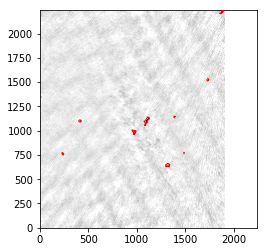

In [9]:
mval = 0.001
mdel = 0.002
npix = 10
pdf_bool = True

filename = '/lustre/aoc/students/jotter/masked/orion_B7_cont_masked_1900.fits'

reg_file = 'orion_sourceI_B7/B7_masked_dendrogram_minval{}_mindelta{}_npix{}.reg'.format(mval, mdel, npix)
pdf_name = 'orion_sourceI_B7/B7_masked_image_minval{}_mindelta{}_npix{}.pdf'.format(mval, mdel, npix)
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
catalog = compute_regions(mval, mdel, npix, pdf_bool)